# Feature Engineering for NLP in Python

https://learn.datacamp.com/courses/feature-engineering-for-nlp-in-python

## Pre-reqs

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pprint
import time

!pip install textatistic
from textatistic import Textatistic

import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_data = '/content/drive/My Drive/Data Science/DataCamp/Datasets/'

### Loading CSV files to DataFrames

In [4]:
df1 = pd.read_csv(path_data+'df1.csv')
tweets = pd.read_csv(path_data+'russian_tweets.csv')
ted = pd.read_csv(path_data+'ted.csv')
fakenews = pd.read_csv(path_data+'fakenews.csv')
movie_reviews_clean = pd.read_csv(path_data+'movie_reviews_clean.csv')
movie_overviews = pd.read_csv(path_data+'movie_overviews.csv')
pink_floyd_lyrics = pd.read_csv(path_data+'pink_floyd_lyrics.csv', header=None)

### Loading Text Files

In [5]:
sisyphus_essay = pd.read_csv(path_data+'sisyphus_essay.txt', sep='\n', header=None)
sisyphus_essay = str(sisyphus_essay[0].values[0]).replace("\\n", "\n")

forbes = pd.read_csv(path_data+'forbes.txt', sep='\n', header=None)
forbes = str(forbes[0].values[0]).replace("\\n", "\n")

harvard_law = pd.read_csv(path_data+'harvard_law.txt', sep='\n', header=None)
harvard_law = str(harvard_law[0].values[0]).replace("\\n", "\n")

r_digest = pd.read_csv(path_data+'r_digest.txt', sep='\n', header=None)
r_digest = str(r_digest[0].values[0]).replace("\\n", "\n")

time_kids = pd.read_csv(path_data+'time_kids.txt', sep='\n', header=None)
time_kids = str(time_kids[0].values[0]).replace("\\n", "\n")

gettysburg = pd.read_csv(path_data+'gettysburg.txt', header=None)
gettysburg = str(gettysburg[0].values[0])

blog = pd.read_csv(path_data+'blogpost.txt', sep='\n', header=None)
blog = str(blog[0].values[0]).replace("\\n", "\n")

## 1) Basic features and readability scores

### Introduction to NLP feature engineering

In [6]:
# Print first five rows
df1.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,29.0000,0,0,211.3375,female,1
1,0.9167,1,2,151.5500,male,1
2,2.0000,1,2,151.5500,female,0
3,30.0000,1,2,151.5500,male,0
4,25.0000,1,2,151.5500,female,0


In [7]:
# Print the features of df1
print(df1.columns)

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')


In [8]:
# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')


In [9]:
# Print first five rows
df1.head()

,feature 1,feature 2,feature 3,feature 4,label,feature 5_female,feature 5_male
0,29.0000,0,0,211.3375,1,1,0
1,0.9167,1,2,151.5500,1,0,1
2,2.0000,1,2,151.5500,0,1,0
3,30.0000,1,2,151.5500,0,0,1
4,25.0000,1,2,151.5500,0,1,0


### Basic feature extraction

**Character count of Russian tweets**

In [10]:
# Print first five rows
tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


In [11]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print first five rows of df1
tweets.head()

,Unnamed: 0,content,char_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
2,226970,.@vfpatlas well that's a swella word there (di...,65
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
4,161610,Жители обстреливаемых районов Донецка проводят...,131


In [12]:
# Print the average character count
print(tweets['char_count'].mean())

103.462


**Word count of TED talks**

In [13]:
# Print first five rows
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [14]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

In [15]:
# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print first five rows
ted.head()

,transcript,url,word_count
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480


In [16]:
# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


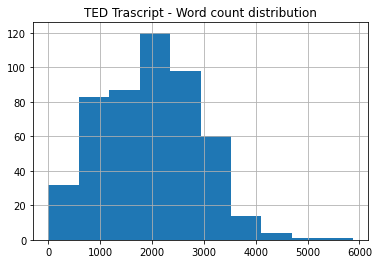

In [17]:
ted['word_count'].hist()
plt.title('TED Trascript - Word count distribution')
plt.show()

**Hashtags and mentions in Russian tweets**

In [18]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)

# Print first five rows of df1
tweets.head()

,Unnamed: 0,content,char_count,hashtag_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130,0
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138,1
2,226970,.@vfpatlas well that's a swella word there (di...,65,0
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139,0
4,161610,Жители обстреливаемых районов Донецка проводят...,131,1


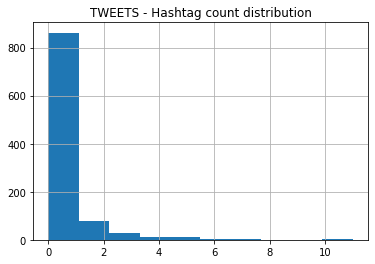

In [19]:
tweets['hashtag_count'].hist()
plt.title('TWEETS - Hashtag count distribution')
plt.show()

In [20]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)

# Print first five rows of df1
tweets.head()

,Unnamed: 0,content,char_count,hashtag_count,mention_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130,0,0
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138,1,0
2,226970,.@vfpatlas well that's a swella word there (di...,65,0,0
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139,0,0
4,161610,Жители обстреливаемых районов Донецка проводят...,131,1,0


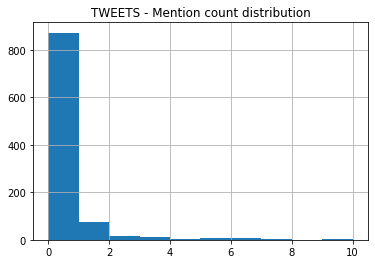

In [21]:
tweets['mention_count'].hist()
plt.title('TWEETS - Mention count distribution')
plt.show()

### Readability tests

**Readability of 'The Myth of Sisyphus'**

Computing the **Flesch reading ease score** for Albert Camus' famous essay The Myth of Sisyphus.

In [22]:
pprint.pprint(sisyphus_essay)

("'\n"
 'The gods had condemned Sisyphus to ceaselessly rolling a rock to the top of '
 'a mountain, whence the stone would fall back of its own weight. They had '
 'thought with some reason that there is no more dreadful punishment than '
 'futile and hopeless labor. If one believes Homer, Sisyphus was the wisest '
 'and most prudent of mortals. According to another tradition, however, he was '
 'disposed to practice the profession of highwayman. I see no contradiction in '
 'this. Opinions differ as to the reasons why he became the futile laborer of '
 'the underworld. To begin with, he is accused of a certain levity in regard '
 'to the gods. He stole their secrets. Egina, the daughter of Esopus, was '
 'carried off by Jupiter. The father was shocked by that disappearance and '
 'complained to Sisyphus. He, who knew of the abduction, offered to tell about '
 'it on condition that Esopus would give water to the citadel of Corinth. To '
 'the celestial thunderbolts he preferred the be

In [23]:
# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


**Readability of various publications**

Computing the readability of below excerpts using the **Gunning fog index** and consequently, determine the relative difficulty of reading these publications.

* *forbes* - An excerpt from an article from Forbes magazine on the Chinese social credit score system.   
* *harvard_law* - An excerpt from a book review published in Harvard Law Review.   
* *r_digest* - An excerpt from a Reader's Digest article on flight turbulence.   
* *time_kids* - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

In [24]:
# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []

for excerpt in excerpts:
  readability_scores = Textatistic(excerpt).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


## 2) Text preprocessing, POS tagging and NER

### Tokenization and Lemmatization

One of the most famous speeches of all time:

the **Gettysburg Address** delivered by *American President Abraham Lincoln* during the *American Civil War*.

In [25]:
pprint.pprint(gettysburg)

('Four score and seven years ago our fathers brought forth on this continent, '
 'a new nation, conceived in Liberty, and dedicated to the proposition that '
 "all men are created equal. Now we're engaged in a great civil war, testing "
 'whether that nation, or any nation so conceived and so dedicated, can long '
 "endure. We're met on a great battlefield of that war. We've come to dedicate "
 'a portion of that field, as a final resting place for those who here gave '
 "their lives that that nation might live. It's altogether fitting and proper "
 "that we should do this. But, in a larger sense, we can't dedicate - we can "
 'not consecrate - we can not hallow - this ground. The brave men, living and '
 'dead, who struggled here, have consecrated it, far above our poor power to '
 'add or detract. The world will little note, nor long remember what we say '
 'here, but it can never forget what they did here. It is for us the living, '
 'rather, to be dedicated here to the unfinished w

In [26]:
# Create a Doc object
doc = nlp(gettysburg)

**Tokenizing**

In [27]:
# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

**Lemmatizing**

In [28]:
# Generate lemmas
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['four', 'score', 'and', 'seven', 'year', 'ago', '-PRON-', 'father', 'bring', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceive', 'in', 'Liberty', ',', 'and', 'dedicate', 'to', 'the', 'proposition', 'that', 'all', 'man', 'be', 'create', 'equal', '.', 'now', '-PRON-', 'be', 'engage', 'in', 'a', 'great', 'civil', 'war', ',', 'test', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceive', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', '-PRON-', 'be', 'meet', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', '-PRON-', 'have', 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'give', '-PRON-', 'life', 'that', 'that', 'nation', 'may', 'live', '.', '-PRON-', 'be', 'altogether', 'fitting', 'and', 'proper', 'that', '-PRON-', 'should', 'do', 'this', '.', 'but', ',', 'in', 'a', 'large', 'sense', ',', '-PRON-', 'can', 'not', 'dedicate', 

In [29]:
# Convert lemmas into a string
pprint.pprint(' '.join(lemmas))

('four score and seven year ago -PRON- father bring forth on this continent , '
 'a new nation , conceive in Liberty , and dedicate to the proposition that '
 'all man be create equal . now -PRON- be engage in a great civil war , test '
 'whether that nation , or any nation so conceive and so dedicated , can long '
 'endure . -PRON- be meet on a great battlefield of that war . -PRON- have '
 'come to dedicate a portion of that field , as a final resting place for '
 'those who here give -PRON- life that that nation may live . -PRON- be '
 'altogether fitting and proper that -PRON- should do this . but , in a large '
 'sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can not '
 'hallow - this ground . the brave man , living and dead , who struggle here , '
 'have consecrate -PRON- , far above -PRON- poor power to add or detract . the '
 'world will little note , nor long remember what -PRON- say here , but -PRON- '
 'can never forget what -PRON- do here . -PRON- be f

### Text cleaning

**Cleaning a blog post**

* converting to lowercase
* lemmatization
* removing stopwords
* removing punctuations
* removing non-alphabetic characters

In [30]:
pprint.pprint(blog)

("'\n"
 'Twenty-first-century politics has witnessed an alarming rise of populism in '
 'the U.S. and Europe. The first warning signs came with the UK Brexit '
 'Referendum vote in 2016 swinging in the way of Leave. This was followed by a '
 'stupendous victory by billionaire Donald Trump to become the 45th President '
 'of the United States in November 2016. Since then, Europe has seen a steady '
 'rise in populist and far-right parties that have capitalized on Europe’s '
 'Immigration Crisis to raise nationalist and anti-Europe sentiments. Some '
 'instances include Alternative for Germany (AfD) winning 12.6% of all seats '
 'and entering the Bundestag, thus upsetting Germany’s political order for the '
 'first time since the Second World War, the success of the Five Star Movement '
 'in Italy and the surge in popularity of neo-nazism and neo-fascism in '
 'countries such as Hungary, Czech Republic, Poland and Austria.\n'
 "'")


**Stopwords**

https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/

In [31]:
# Create a Doc object
doc = nlp(blog)

# Create list of word tokens
token_list = [token.text for token in doc]

# Create list of stop words
stopwords = [word.lower() for word in token_list if nlp.vocab[word].is_stop == True] 

print(token_list)
print(stopwords)

["'", '\n', 'Twenty', '-', 'first', '-', 'century', 'politics', 'has', 'witnessed', 'an', 'alarming', 'rise', 'of', 'populism', 'in', 'the', 'U.S.', 'and', 'Europe', '.', 'The', 'first', 'warning', 'signs', 'came', 'with', 'the', 'UK', 'Brexit', 'Referendum', 'vote', 'in', '2016', 'swinging', 'in', 'the', 'way', 'of', 'Leave', '.', 'This', 'was', 'followed', 'by', 'a', 'stupendous', 'victory', 'by', 'billionaire', 'Donald', 'Trump', 'to', 'become', 'the', '45th', 'President', 'of', 'the', 'United', 'States', 'in', 'November', '2016', '.', 'Since', 'then', ',', 'Europe', 'has', 'seen', 'a', 'steady', 'rise', 'in', 'populist', 'and', 'far', '-', 'right', 'parties', 'that', 'have', 'capitalized', 'on', 'Europe', '’s', 'Immigration', 'Crisis', 'to', 'raise', 'nationalist', 'and', 'anti', '-', 'Europe', 'sentiments', '.', 'Some', 'instances', 'include', 'Alternative', 'for', 'Germany', '(', 'AfD', ')', 'winning', '12.6', '%', 'of', 'all', 'seats', 'and', 'entering', 'the', 'Bundestag', ',',

In [32]:
# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]

print(a_lemmas)

['century', 'politic', 'witness', 'alarming', 'rise', 'populism', 'Europe', 'warning', 'sign', 'come', 'UK', 'Brexit', 'Referendum', 'vote', 'swinging', 'way', 'Leave', 'be', 'follow', 'stupendous', 'victory', 'billionaire', 'Donald', 'Trump', 'President', 'United', 'States', 'November', 'Europe', 'see', 'steady', 'rise', 'populist', 'far', 'right', 'party', 'capitalize', 'Europe', 'Immigration', 'Crisis', 'raise', 'nationalist', 'anti', 'europe', 'sentiment', 'instance', 'include', 'alternative', 'Germany', 'AfD', 'win', 'seat', 'enter', 'Bundestag', 'upset', 'Germany', 'political', 'order', 'time', 'Second', 'World', 'War', 'success', 'Star', 'Movement', 'Italy', 'surge', 'popularity', 'neo', 'nazism', 'neo', 'fascism', 'country', 'Hungary', 'Czech', 'Republic', 'Poland', 'Austria']


In [33]:
# Print string after text cleaning
pprint.pprint(' '.join(a_lemmas))

('century politic witness alarming rise populism Europe warning sign come UK '
 'Brexit Referendum vote swinging way Leave be follow stupendous victory '
 'billionaire Donald Trump President United States November Europe see steady '
 'rise populist far right party capitalize Europe Immigration Crisis raise '
 'nationalist anti europe sentiment instance include alternative Germany AfD '
 'win seat enter Bundestag upset Germany political order time Second World War '
 'success Star Movement Italy surge popularity neo nazism neo fascism country '
 'Hungary Czech Republic Poland Austria')


**Cleaning TED talks in a dataframe**

In [34]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)

In [35]:
stopwords = [
 'fifteen',
 'noone',
 'whereupon',
 'could',
 'ten',
 'all',
 'please',
 'indeed',
 'whole',
 'beside',
 'therein',
 'using',
 'but',
 'very',
 'already',
 'about',
 'no',
 'regarding',
 'afterwards',
 'front',
 'go',
 'in',
 'make',
 'three',
 'here',
 'what',
 'without',
 'yourselves',
 'which',
 'nothing',
 'am',
 'between',
 'along',
 'herein',
 'sometimes',
 'did',
 'as',
 'within',
 'elsewhere',
 'was',
 'forty',
 'becoming',
 'how',
 'will',
 'other',
 'bottom',
 'these',
 'amount',
 'across',
 'the',
 'than',
 'first',
 'namely',
 'may',
 'none',
 'anyway',
 'again',
 'eleven',
 'his',
 'meanwhile',
 'name',
 're',
 'from',
 'some',
 'thru',
 'upon',
 'whither',
 'he',
 'such',
 'down',
 'my',
 'often',
 'whether',
 'made',
 'while',
 'empty',
 'two',
 'latter',
 'whatever',
 'cannot',
 'less',
 'many',
 'you',
 'ours',
 'done',
 'thus',
 'since',
 'everything',
 'for',
 'more',
 'unless',
 'former',
 'anyone',
 'per',
 'seeming',
 'hereafter',
 'on',
 'yours',
 'always',
 'due',
 'last',
 'alone',
 'one',
 'something',
 'twenty',
 'until',
 'latterly',
 'seems',
 'were',
 'where',
 'eight',
 'ourselves',
 'further',
 'themselves',
 'therefore',
 'they',
 'whenever',
 'after',
 'among',
 'when',
 'at',
 'through',
 'put',
 'thereby',
 'then',
 'should',
 'formerly',
 'third',
 'who',
 'this',
 'neither',
 'others',
 'twelve',
 'also',
 'else',
 'seemed',
 'has',
 'ever',
 'someone',
 'its',
 'that',
 'does',
 'sixty',
 'why',
 'do',
 'whereas',
 'are',
 'either',
 'hereupon',
 'rather',
 'because',
 'might',
 'those',
 'via',
 'hence',
 'itself',
 'show',
 'perhaps',
 'various',
 'during',
 'otherwise',
 'thereafter',
 'yourself',
 'become',
 'now',
 'same',
 'enough',
 'been',
 'take',
 'their',
 'seem',
 'there',
 'next',
 'above',
 'mostly',
 'once',
 'a',
 'top',
 'almost',
 'six',
 'every',
 'nobody',
 'any',
 'say',
 'each',
 'them',
 'must',
 'she',
 'throughout',
 'whence',
 'hundred',
 'not',
 'however',
 'together',
 'several',
 'myself',
 'i',
 'anything',
 'somehow',
 'or',
 'used',
 'keep',
 'much',
 'thereupon',
 'ca',
 'just',
 'behind',
 'can',
 'becomes',
 'me',
 'had',
 'only',
 'back',
 'four',
 'somewhere',
 'if',
 'by',
 'whereafter',
 'everywhere',
 'beforehand',
 'well',
 'doing',
 'everyone',
 'nor',
 'five',
 'wherein',
 'so',
 'amongst',
 'though',
 'still',
 'move',
 'except',
 'see',
 'us',
 'your',
 'against',
 'although',
 'is',
 'became',
 'call',
 'have',
 'most',
 'wherever',
 'few',
 'out',
 'whom',
 'yet',
 'be',
 'own',
 'off',
 'quite',
 'with',
 'and',
 'side',
 'whoever',
 'would',
 'both',
 'fifty',
 'before',
 'full',
 'get',
 'sometime',
 'beyond',
 'part',
 'least',
 'besides',
 'around',
 'even',
 'whose',
 'hereby',
 'up',
 'being',
 'we',
 'an',
 'him',
 'below',
 'moreover',
 'really',
 'it',
 'of',
 'our',
 'nowhere',
 'whereby',
 'too',
 'her',
 'toward',
 'anyhow',
 'give',
 'never',
 'another',
 'anywhere',
 'mine',
 'herself',
 'over',
 'himself',
 'to',
 'onto',
 'into',
 'thence',
 'towards',
 'hers',
 'nevertheless',
 'serious',
 'under',
 'nine'
 ]

In [36]:
%%time
# Apply preprocess to ted['transcript']
ted['transcript_clean'] = ted['transcript'].apply(preprocess)

CPU times: user 42.3 s, sys: 1.28 s, total: 43.5 s
Wall time: 43.6 s


In [37]:
# Print first five rows
ted[['transcript', 'transcript_clean']].head()

,transcript,transcript_clean
0,"We're going to talk — my — a new lecture, just...",talk new lecture TED illusion create TED try r...
1,"This is a representation of your brain, and yo...",representation brain brain break left half log...
2,It's a great honor today to share with you The...,great honor today share Digital Universe creat...
3,"My passions are music, technology and making t...",passion music technology thing combination thi...
4,It used to be that if you wanted to get a comp...,use want computer new program programming requ...


### Part-of-speech tagging

https://spacy.io/api/annotation#pos-tagging

**POS tagging in Lord of the Flies**

In [38]:
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation \
and a considerable part of one’s waking life was spent watching one’s feet.'

In [39]:
# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'PRON'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


**Counting nouns in a piece of text**

In [40]:
# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

In [41]:
print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [42]:
# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

In [43]:
print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


**Noun usage in fake news**

In [44]:
headlines = fakenews.copy()

In [45]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)
headlines['num_noun'] = headlines['title'].apply(nouns)

headlines.head()

,Unnamed: 0,title,label,num_propn,num_noun
0,0,You Can Smell Hillary’s Fear,FAKE,1,1
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,8,1
2,2,Kerry to go to Paris in gesture of sympathy,REAL,2,2
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE,2,3
4,4,The Battle of New York: Why This Primary Matters,REAL,4,0


In [46]:
# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of proper nouns in real and fake headlines are 2.37 and 4.35 respectively
Mean no. of other nouns in real and fake headlines are 2.32 and 1.84 respectively


### Named entity recognition

https://spacy.io/api/annotation#named-entities

**Named entities in a sentence**

In [47]:
# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


**Identifying people mentioned in a news article**

In [48]:
# news article published in TechCrunch
tc = "It’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg \
      broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg \
      is calling on governments and other bodies to increase regulation around the sorts of \
      data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation \
      and get a seat at the table shaping it."

In [49]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


## 3) N-Gram models

### Building a bag of words model

In [50]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

**BoW model for movie taglines**

In [51]:
corpus = pd.Series(
    ['Roll the dice and unleash the excitement!',
     'Still Yelling. Still Fighting. Still Ready for Love.',
     'Friends are the people who let you be yourself... and never let you forget it.',
     "Just When His World Is Back To Normal... He's In For The Surprise Of His Life!",
     'A Los Angeles Crime Saga',
     'You are cordially invited to the most surprising merger of the year.',
     'No limits. No fears. No substitutes.',
     "Why can't the most powerful man in the world have the one thing he wants most?",
     'Part Dog. Part Wolf. All Hero.',
     'Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation.'
    ])

corpus

0            Roll the dice and unleash the excitement!
1    Still Yelling. Still Fighting. Still Ready for...
2    Friends are the people who let you be yourself...
3    Just When His World Is Back To Normal... He's ...
4                             A Los Angeles Crime Saga
5    You are cordially invited to the most surprisi...
6                 No limits. No fears. No substitutes.
7    Why can't the most powerful man in the world h...
8                       Part Dog. Part Wolf. All Hero.
9    Triumphant in Victory, Bitter in Defeat. He Ch...
dtype: object

In [52]:
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

(10, 71)


**Analyzing dimensionality and preprocessing**

In [53]:
lem_corpus = pd.Series(
    ['roll dice unleash excitement',
     'yell fight ready love',
     'friend people let let forget',
     'world normal surprise life',
     'los angeles crime saga',
     'cordially invite surprising merger year', 'original bad boys',
     'limit fear substitute',
     'powerful man world thing want',
     'dog wolf hero',
     'triumphant victory bitter defeat change world lose nation'
     ])

lem_corpus

0                          roll dice unleash excitement
1                                 yell fight ready love
2                          friend people let let forget
3                            world normal surprise life
4                                los angeles crime saga
5               cordially invite surprising merger year
6                                     original bad boys
7                                 limit fear substitute
8                         powerful man world thing want
9                                         dog wolf hero
10    triumphant victory bitter defeat change world ...
dtype: object

In [54]:
# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(11, 45)


**Mapping feature indices with feature names**

In [55]:
corpus = ['The lion is the king of the jungle',
          'Lions have lifespans of a decade',
          'The lion is an endangered species']

In [56]:
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

   an  decade  endangered  have  is  ...  lion  lions  of  species  the
0   0       0           0     0   1  ...     1      0   1        0    3
1   0       1           0     1   0  ...     0      1   1        0    0
2   1       0           1     0   1  ...     1      0   0        1    1

[3 rows x 13 columns]


### Building a BoW Naive Bayes classifier

In [57]:
print(movie_reviews_clean.shape)
movie_reviews_clean.head()

(1000, 2)


,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


**BoW vectors for movie reviews**

In [58]:
X = movie_reviews_clean['review']
y = movie_reviews_clean['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, stratify=y, random_state=42)

In [59]:
# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(250, 8158)
(750, 8158)


In [60]:
vectorizer.get_feature_names()[-9:]

['zima', 'zings', 'zippy', 'zoe', 'zoey', 'zombie', 'zombies', 'zone', 'zoom']

In [61]:
pd.DataFrame(X_train_bow.toarray()).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8118,8119,8120,8121,8122,8123,8124,8125,8126,8127,8128,8129,8130,8131,8132,8133,8134,8135,8136,8137,8138,8139,8140,8141,8142,8143,8144,8145,8146,8147,8148,8149,8150,8151,8152,8153,8154,8155,8156,8157
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Predicting the sentiment of a movie review**

In [62]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

The accuracy of the classifier on the test set is 0.732


**Predict the sentiment of a NEGATIVE review**

In [63]:
review_neg = "The movie was terrible. The music was underwhelming and the acting mediocre."

print(vectorizer.transform([review_neg]).toarray())
print()
vectorizer.transform([review_neg]).toarray().shape

[[0 0 0 ... 0 0 0]]



(1, 8158)

In [64]:
prediction = clf.predict(vectorizer.transform([review_neg]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The sentiment predicted by the classifier is 0


**Predict the sentiment of a POSITIVE review**

In [65]:
review_pos = "The movie was wonderful. The music was overrwhelming and the acting great."

prediction = clf.predict(vectorizer.transform([review_pos]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The sentiment predicted by the classifier is 1


### Building n-gram models

In [66]:
print(movie_overviews.shape)
movie_overviews.head()

(9099, 4)


,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


**n-gram models for movie tag lines**

In [67]:
corpus = pd.Series(data=movie_overviews['tagline']).fillna('')
corpus.head()

0                                                     
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
3    Friends are the people who let you be yourself...
4    Just When His World Is Back To Normal... He's ...
Name: tagline, dtype: object

In [68]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 6614, 37100 and 76881 features respectively


**Higher order n-grams for sentiment analysis**

In [69]:
X = movie_reviews_clean['review']
y = movie_reviews_clean['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [70]:
# Create a CountVectorizer object
ng_vectorizer = CountVectorizer(ngram_range=(1,2))

# Fit and transform X_train
X_train_ng = ng_vectorizer.fit_transform(X_train)

# Transform X_test
X_test_ng = ng_vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_ng.shape)
print(X_test_ng.shape)

(500, 79059)
(500, 79059)


In [71]:
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

The accuracy of the classifier on the test set is 0.758


In [72]:
# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The sentiment predicted by the classifier is 0


**Comparing performance of n-gram models**

In [73]:
X = movie_reviews_clean['review']
y = movie_reviews_clean['sentiment']

# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [74]:
start_time = time.time()

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete." % (time.time() - start_time))
print("The accuracy on the test set is %.2f." % clf.score(test_X, test_y))
print("The ngram representation had %i features." % train_X.shape[1])

The program took 0.179 seconds to complete.
The accuracy on the test set is 0.75.
The ngram representation had 12347 features.


In [75]:
X = movie_reviews_clean['review']
y = movie_reviews_clean['sentiment']

# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [76]:
start_time = time.time()

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete." % (time.time() - start_time))
print("The accuracy on the test set is %.2f." % clf.score(test_X, test_y))
print("The ngram representation had %i features." % train_X.shape[1])

The program took 1.185 seconds to complete.
The accuracy on the test set is 0.77.
The ngram representation had 178240 features.


## 4) TF-IDF and similarity scores

### Building tf-idf document vectors

In [77]:
ted.transcript.head()

0    We're going to talk — my — a new lecture, just...
1    This is a representation of your brain, and yo...
2    It's a great honor today to share with you The...
3    My passions are music, technology and making t...
4    It used to be that if you wanted to get a comp...
Name: transcript, dtype: object

In [78]:
ted.shape

(500, 4)

**tf-idf vectors for TED talks**

In [79]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted.transcript)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


### Cosine similarity

**Computing dot product**

In [80]:
# Initialize numpy vectors
A = np.array([1,3])
B = np.array([-2,2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

4


**Cosine similarity matrix of a corpus**

In [81]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

In [82]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


### Building a plot line based recommender

**Comparing linear_kernel and cosine_similarity**

In [83]:
movie_overviews.head()

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [84]:
corpus = movie_overviews['overview'].fillna('')

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [85]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.03390146 0.01370008 ... 0.00643539 0.03413806 0.0352065 ]
 [0.03390146 1.         0.05852642 ... 0.01047157 0.04605981 0.04855061]
 [0.01370008 0.05852642 1.         ... 0.00883147 0.04215594 0.03044062]
 ...
 [0.00643539 0.01047157 0.00883147 ... 1.         0.02633556 0.01110007]
 [0.03413806 0.04605981 0.04215594 ... 0.02633556 1.         0.05601986]
 [0.0352065  0.04855061 0.03044062 ... 0.01110007 0.05601986 1.        ]]
Time taken: 4.023766279220581 seconds


In [86]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.03390146 0.01370008 ... 0.00643539 0.03413806 0.0352065 ]
 [0.03390146 1.         0.05852642 ... 0.01047157 0.04605981 0.04855061]
 [0.01370008 0.05852642 1.         ... 0.00883147 0.04215594 0.03044062]
 ...
 [0.00643539 0.01047157 0.00883147 ... 1.         0.02633556 0.01110007]
 [0.03413806 0.04605981 0.04215594 ... 0.02633556 1.         0.05601986]
 [0.0352065  0.04855061 0.03044062 ... 0.01110007 0.05601986 1.        ]]
Time taken: 4.11933159828186 seconds


**The recommender function**

In [87]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

**Plot recommendation engine**

In [88]:
metadata = movie_overviews[['title', 'overview']]
metadata.head(3)

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...


In [89]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()
indices.head(3)

title
Toy Story           0
Jumanji             1
Grumpier Old Men    2
dtype: int64

In [90]:
movie_plots = movie_overviews['overview'].fillna('')
movie_plots.head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

In [91]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [92]:
# Generate recommendations 
print(get_recommendations('Toy Story', cosine_sim, indices))

7543               Toy Story 3
2504               Toy Story 2
6199    The 40 Year Old Virgin
892      Rebel Without a Cause
6561    For Your Consideration
2549           Man on the Moon
437                     Malice
1601                 Condorman
6634              Factory Girl
4993          Rivers and Tides
Name: title, dtype: object


**TED talk recommender**

In [93]:
ted['title'] = ted.url.apply(lambda x: x.split('https://www.ted.com/talks/')[1].replace('\n','').replace('_',' '))
metadata = ted[['title', 'transcript']]
metadata.head(3)

,title,transcript
0,al seckel says our brains are mis wired,"We're going to talk — my — a new lecture, just..."
1,aaron o connell making sense of a visible quan...,"This is a representation of your brain, and yo..."
2,carter emmart demos a 3d atlas of the universe,It's a great honor today to share with you The...


In [94]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()
indices.head(3)

title
al seckel says our brains are mis wired                     0
aaron o connell making sense of a visible quantum object    1
carter emmart demos a 3d atlas of the universe              2
dtype: int64

In [95]:
transcripts = ted['transcript'].fillna('')
transcripts.head(3)

0    We're going to talk — my — a new lecture, just...
1    This is a representation of your brain, and yo...
2    It's a great honor today to share with you The...
Name: transcript, dtype: object

In [96]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [97]:
# Generate recommendations 
print(get_recommendations('al seckel says our brains are mis wired' , cosine_sim, indices))

65                     kary mullis on what scientists do
456                    gregory stock to upgrade is human
97     dan ariely asks are we in control of our own d...
223    ricardo semler how to run a company with almos...
104                   rob legato the art of creating awe
323                     nic marks the happy planet index
153             scott dinsmore how to find work you love
57                     alison jackson looks at celebrity
432    paola antonelli previews design and the elasti...
120                  vik muniz makes art with wire sugar
Name: title, dtype: object


### Beyond n-grams: word embeddings

In [98]:
%%time
!python -m spacy download en_core_web_md
import en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
CPU times: user 34.1 ms, sys: 30 ms, total: 64.1 ms
Wall time: 5.51 s


In [99]:
# Load the en_core_web_md model
nlp_md = en_core_web_md.load()

**Generating word vectors**

In [100]:
sent = "I like apples and oranges"

In [101]:
# Create the doc object
doc = nlp_md(sent)

# Compute pairwise similarity scores
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.55549127
I apples 0.20442723
I and 0.31607857
I oranges 0.18824081
like I 0.55549127
like like 1.0
like apples 0.32987145
like and 0.5267485
like oranges 0.27717474
apples I 0.20442723
apples like 0.32987145
apples apples 1.0
apples and 0.2409773
apples oranges 0.77809423
and I 0.31607857
and like 0.5267485
and apples 0.2409773
and and 1.0
and oranges 0.19245945
oranges I 0.18824081
oranges like 0.27717474
oranges apples 0.77809423
oranges and 0.19245945
oranges oranges 1.0


**Computing similarity of Pink Floyd songs**

In [102]:
pink_floyd_lyrics

,0,1,2
0,'hopes','High Hopes',\nBeyond the horizon of the place we lived whe...
1,'hey','Hey You',"\nHey you, out there in the cold\nGetting lone..."
2,'Mother','mother',\nMother do you think they'll drop the bomb?\n...


In [103]:
hopes = pink_floyd_lyrics.loc[0,2].replace('\\n','\n')
hey = pink_floyd_lyrics.loc[1,2].replace('\\n','\n')
mother = pink_floyd_lyrics.loc[2,2].replace('\\n','\n')

In [104]:
hopes

"\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough do

In [105]:
# Create Doc objects
mother_doc = nlp_md(mother)
hopes_doc = nlp_md(hopes)
hey_doc = nlp_md(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.8700284224193019
0.9604979727674751
